In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import scikitplot as skplt

## 1°/ Chargement des données

In [3]:
music = pd.read_csv("data/music_genre.csv")

In [4]:
music.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


## 2°/ Exploration des données 

In [5]:
music.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [6]:
music.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [7]:
music.shape

(50005, 18)

In [8]:
music['obtained_date'].unique()

array(['4-Apr', '3-Apr', '5-Apr', '1-Apr', nan, '0/4'], dtype=object)

In [9]:
music['mode'].unique()

array(['Minor', 'Major', nan], dtype=object)

In [10]:
music['key'].unique()

array(['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#',
       nan], dtype=object)

In [11]:
music['music_genre'].unique()

array(['Electronic', 'Anime', nan, 'Jazz', 'Alternative', 'Country',
       'Rap', 'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

#### II.1. Chercher et supprimer les doublons

In [12]:
music.duplicated().any()


True

In [13]:
duplicated = music.duplicated()

In [14]:
music[duplicated]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
music.iloc[9999:10006]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
9999,41509.0,Hachioji P,Yeah! Yeah!! Yeah!!!,14.0,0.02000,0.573,226374.0,0.921,0.000004,F#,0.325,-3.841,Major,0.0734,135.029,4-Apr,0.599,Anime
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10005,77089.0,Blockhead,"Cheer up, You're Not Dead Yet",44.0,0.00621,0.711,285987.0,0.621,0.029700,G,0.159,-7.429,Major,0.0382,142.065,4-Apr,0.607,Jazz


Maintenant qu'on a trouvé les doublons et nous avons vérifier que c'est bien les seuls en regardant la valeurs avant et après, nous les supprimons car ils ne contiennent que des valeurs NaN

In [16]:
music.drop([10000, 10001, 10002, 10003, 10004], inplace = True)

In [17]:
music.shape

(50000, 18)

Le dataset contient désormais exactement 50000 instances.

Le paramètre 'instance_id' identifie une musique de façon unique (50000 instance_id) nous pouvons supprimer ce paramètre plus tard car il nous aidera pas forçement pour la partie machine learning

In [18]:
len(music["instance_id"].unique()) 

50000

In [19]:
len(music["artist_name"].unique())

6863

Nous n'avons pas d'informations sur "obtained_date", nous allons donc supprimer aussi ce paramètre car il n'a pas vraiment d'impact sur notre étude:

In [20]:
music["obtained_date"].unique() 

array(['4-Apr', '3-Apr', '5-Apr', '1-Apr', '0/4'], dtype=object)

"music_genre" est la colonne target - Celle qui va être prédite.

In [21]:
music["music_genre"].unique()

array(['Electronic', 'Anime', 'Jazz', 'Alternative', 'Country', 'Rap',
       'Blues', 'Rock', 'Classical', 'Hip-Hop'], dtype=object)

reset de l'index supprimer 5 ligne ( doublons ) : voir au dessus

In [22]:
music.reset_index(inplace = True)

In [23]:
music.head()

,index,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [24]:
music = music.drop(["index", "instance_id", "track_name", "obtained_date"], axis = 1)

In [25]:
music.head()

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Röyksopp,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,Thievery Corporation,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,Dillon Francis,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,Dubloadz,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,What So Not,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


#### II.3. Exploration des artistes

In [26]:
music[music["artist_name"] == "empty_field"]

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
19,empty_field,50.0,0.02810,0.656,307328.0,0.653,0.858000,F#,0.1120,-11.883,Minor,0.0396,117.999,0.1990,Electronic
25,empty_field,34.0,0.02360,0.715,221050.0,0.978,0.000493,D,0.2160,-1.538,Major,0.3620,125.109,0.4180,Electronic
44,empty_field,31.0,0.00350,0.595,222147.0,0.904,0.003780,D,0.0533,-6.805,Minor,0.0349,127.61,0.8410,Electronic
128,empty_field,32.0,0.01390,0.498,-1.0,0.945,0.647000,F,0.3380,-0.003,Minor,0.1370,149.888,0.1790,Electronic
135,empty_field,44.0,0.15300,0.792,265133.0,0.549,0.379000,F,0.3430,-9.855,Major,0.0456,120.01299999999999,0.4760,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49937,empty_field,50.0,0.05480,0.754,132414.0,0.840,0.000014,A,0.1500,-5.111,Major,0.3130,144.991,0.0397,Hip-Hop
49951,empty_field,52.0,0.13300,0.867,-1.0,0.618,0.000002,B,0.1280,-4.956,Minor,0.0614,140.005,0.8570,Hip-Hop
49966,empty_field,51.0,0.12400,0.786,187027.0,0.738,0.000000,C,0.1400,-5.621,Major,0.3890,93.758,0.7800,Hip-Hop
49986,empty_field,53.0,0.00392,0.770,211820.0,0.905,0.000003,F,0.1690,-8.235,Minor,0.1440,135.999,0.4640,Hip-Hop


Nous avons 2489 lignes avec le nom d'artiste manquant

In [27]:
artists = music["artist_name"].value_counts()[:20].sort_values(ascending = True)

In [28]:
artists

artist_name
Ryuichi Sakamoto              90
$uicideBoy$                   92
Logic                         92
Howard Shore                  93
Mac Miller                    97
Kevin Gates                  102
Pyotr Ilyich Tchaikovsky     103
The Black Keys               114
Thievery Corporation         122
Future                       124
Eminem                       147
Yuki Hayashi                 167
Capcom Sound Team            169
Drake                        172
Frédéric Chopin              241
Johann Sebastian Bach        314
Ludwig van Beethoven         317
Wolfgang Amadeus Mozart      402
Nobuo Uematsu                429
empty_field                 2489
Name: count, dtype: int64

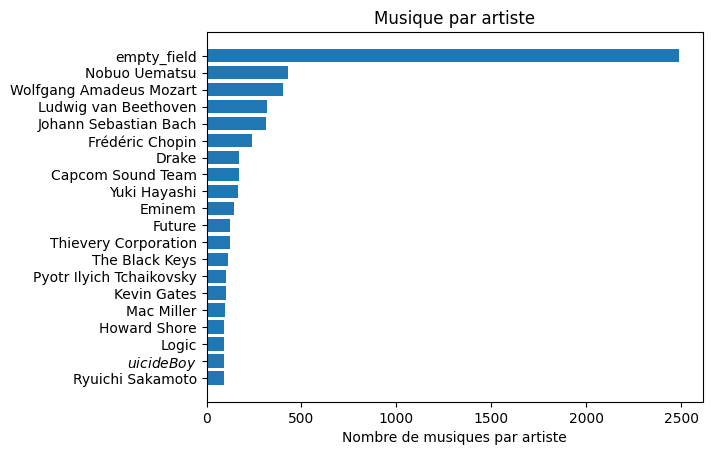

In [29]:
plt.barh(artists.index, artists)
plt.xlabel("Nombre de musiques par artiste")
plt.title("Musique par artiste")
plt.show()

supprimer toutes les lignes avec le noms de l'artiste qui est manquants pour avoir une vision plus informative :

In [30]:
music = music.drop(music[music["artist_name"] == "empty_field"].index)

In [31]:
music

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,Röyksopp,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,Thievery Corporation,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,Dillon Francis,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,Dubloadz,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,What So Not,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,BEXEY,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,0.330,Hip-Hop
49996,Roy Woods,72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,0.113,Hip-Hop
49997,Berner,51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,0.395,Hip-Hop
49998,The-Dream,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,0.354,Hip-Hop


In [32]:
top_20_artists = music["artist_name"].value_counts()[:20].sort_values(ascending = True)

In [33]:
top_20_artists

artist_name
ASIAN KUNG-FU GENERATION     89
Ryuichi Sakamoto             90
$uicideBoy$                  92
Logic                        92
Howard Shore                 93
Mac Miller                   97
Kevin Gates                 102
Pyotr Ilyich Tchaikovsky    103
The Black Keys              114
Thievery Corporation        122
Future                      124
Eminem                      147
Yuki Hayashi                167
Capcom Sound Team           169
Drake                       172
Frédéric Chopin             241
Johann Sebastian Bach       314
Ludwig van Beethoven        317
Wolfgang Amadeus Mozart     402
Nobuo Uematsu               429
Name: count, dtype: int64

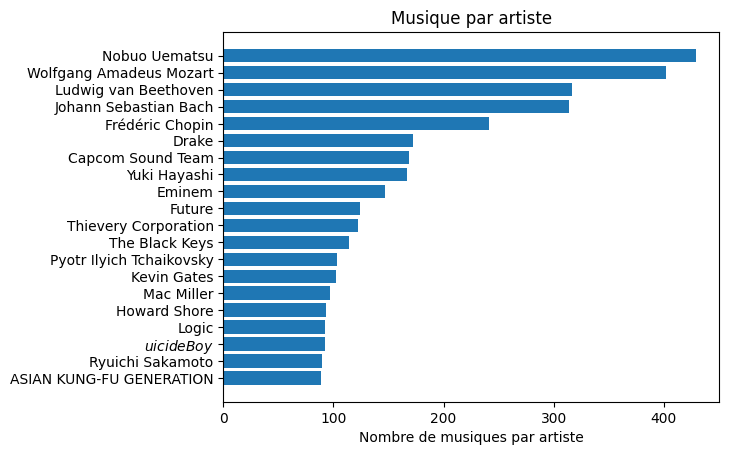

In [34]:
plt.barh(top_20_artists.index, top_20_artists)
plt.xlabel("Nombre de musiques par artiste")
plt.title("Musique par artiste")
plt.show()

cette visualisation qu'un bon nombre d'artiste présent dans le top 20 sont des artistes japonais, nous pouvons en conclure que les données ont été receuillies au Japon.

maintenant supprimer la colonnes des noms des artistes car nous n'avons pas besoin de cette information pour la prédiction du genre

In [35]:
music.drop("artist_name", axis = 1, inplace = True)

In [36]:
music.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47511 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        47511 non-null  float64
 1   acousticness      47511 non-null  float64
 2   danceability      47511 non-null  float64
 3   duration_ms       47511 non-null  float64
 4   energy            47511 non-null  float64
 5   instrumentalness  47511 non-null  float64
 6   key               47511 non-null  object 
 7   liveness          47511 non-null  float64
 8   loudness          47511 non-null  float64
 9   mode              47511 non-null  object 
 10  speechiness       47511 non-null  float64
 11  tempo             47511 non-null  object 
 12  valence           47511 non-null  float64
 13  music_genre       47511 non-null  object 
dtypes: float64(10), object(4)
memory usage: 5.4+ MB


## 3°/ Data visualisation 

Petite fonction qui servira à ploter directement nos variables catégoriques pour avoir une vision globale de ces dernières.

In [37]:
def plot_counts(feature, order = None):
    sns.countplot(x = feature, data = music, palette = "ocean", order = order)
    plt.title(f"Nombre de {feature}")
    plt.show()

C:\Users\patel\AppData\Local\Temp\ipykernel_17252\253317298.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = feature, data = music, palette = "ocean", order = order)


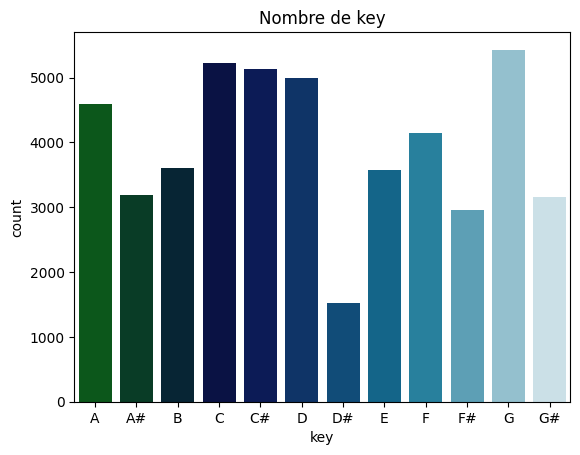

In [38]:
plot_counts("key", ["A", "A#", "B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#"])

C:\Users\patel\AppData\Local\Temp\ipykernel_17252\253317298.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = feature, data = music, palette = "ocean", order = order)


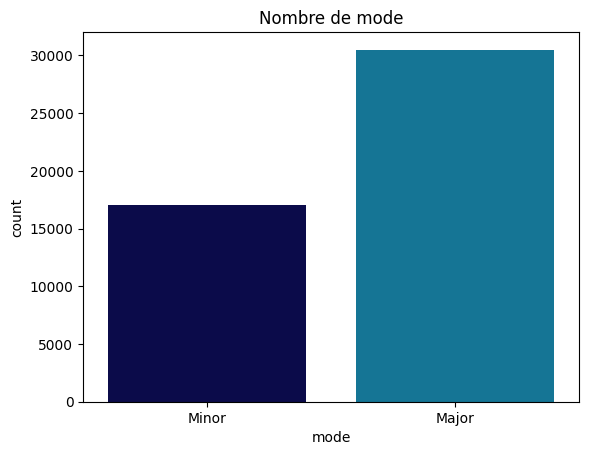

In [39]:
plot_counts("mode")